In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preprocessing ---
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train_one_hot.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test_one_hot.shape)

# For easy access later, store results
performance_summary = {}

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [2]:
# --- 2. Building the Small CNN ---
def build_small_cnn(input_shape=(32, 32, 3)):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ],
        name="small_cnn",
    )
    return model

small_cnn = build_small_cnn()
small_cnn.summary()

Model: "small_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# --- 3. Training the Small CNN ---
small_cnn.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

print("\n--- Training Small CNN from scratch ---")
history_small_cnn = small_cnn.fit(
    x_train,
    y_train_one_hot,
    batch_size=64,
    epochs=15, # Increased epochs for better convergence
    validation_split=0.1,
)

# --- 4. Evaluating the Small CNN ---
test_loss, test_acc = small_cnn.evaluate(x_test, y_test_one_hot)
performance_summary['Small CNN (Baseline)'] = test_acc
print(f"\nSmall CNN Test accuracy: {test_acc:.4f}")


--- Training Small CNN from scratch ---
Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3283 - loss: 1.8145 - val_accuracy: 0.5218 - val_loss: 1.3729
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5472 - loss: 1.2771 - val_accuracy: 0.6050 - val_loss: 1.1228
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6039 - loss: 1.1204 - val_accuracy: 0.6130 - val_loss: 1.0868
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6510 - loss: 1.0007 - val_accuracy: 0.6224 - val_loss: 1.1125
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6678 - loss: 0.9444 - val_accuracy: 0.6686 - val_loss: 0.9407
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7013 - loss: 0.8517 - val_accuracy: 0.6846 - val_loss: 0.9108
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7146 - loss: 0.8181 - val_accuracy: 0.6910 - val_loss: 0.9003
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy:

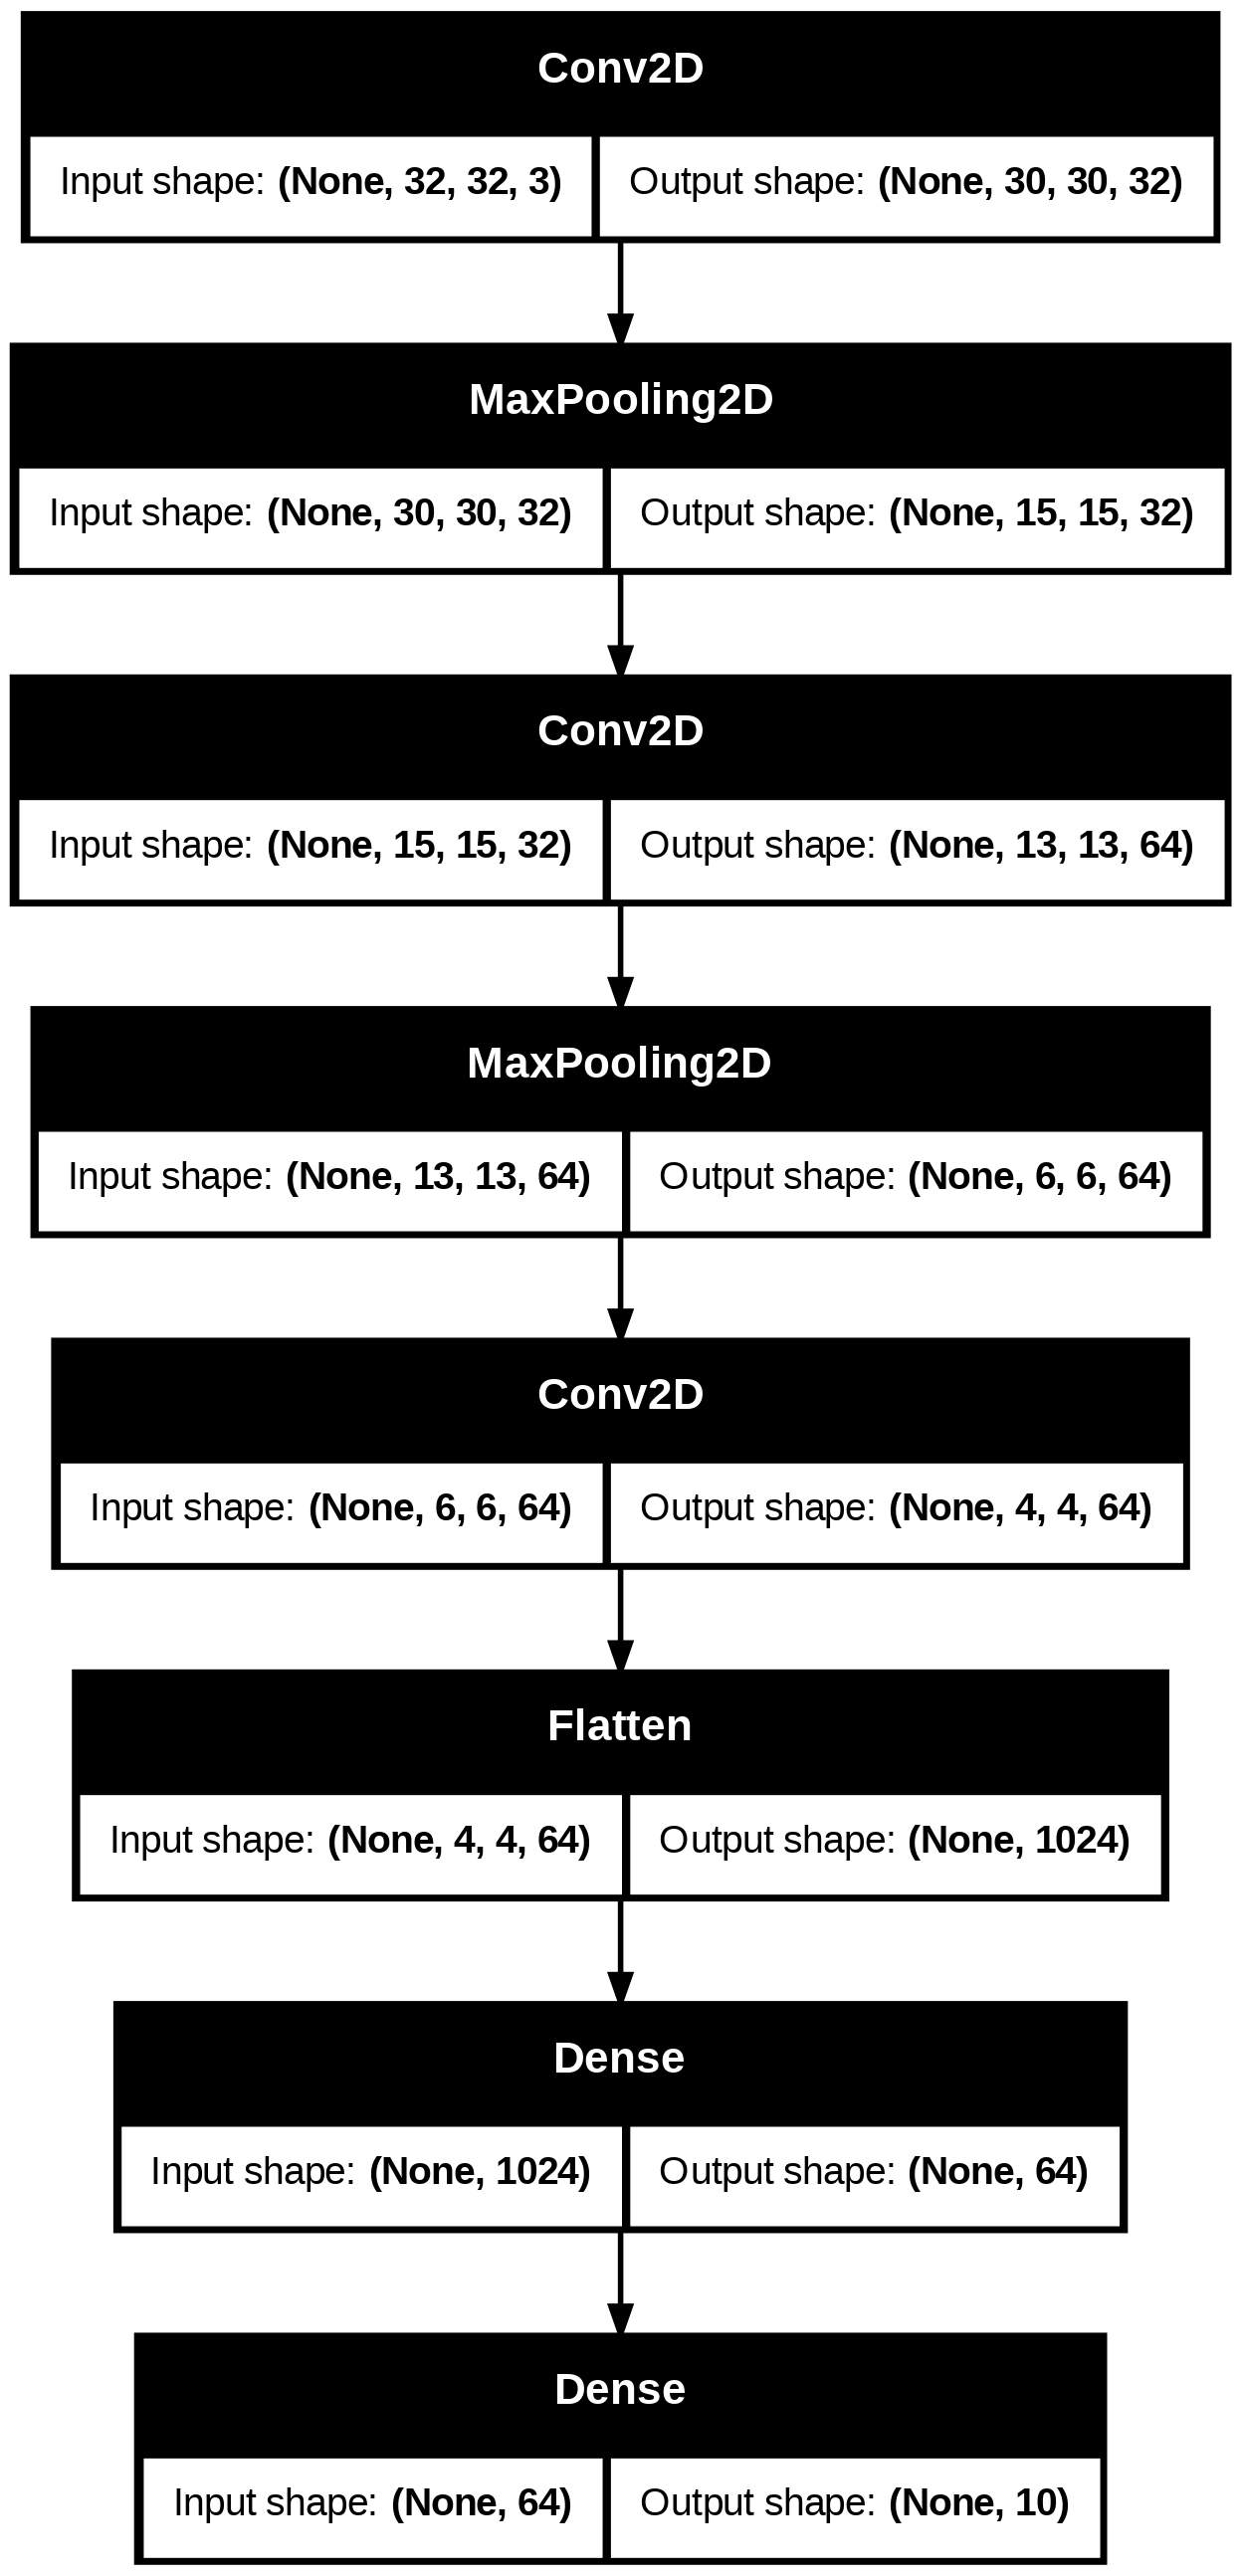

In [4]:
# --- Figure 1: Architecture of the Small CNN ---
keras.utils.plot_model(small_cnn, to_file="small_cnn_architecture.png", show_shapes=True)

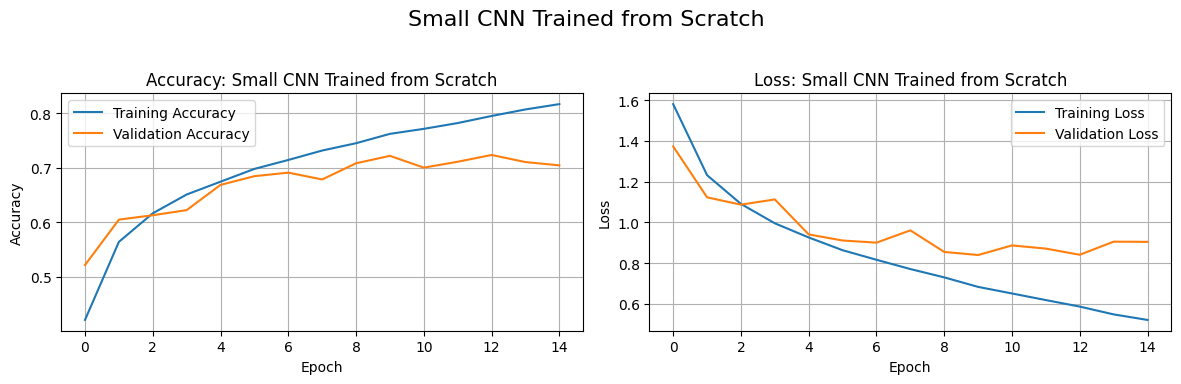

In [5]:
# --- Figure 2: Training Performance of Small CNN ---
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy: {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss: {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_history(history_small_cnn, "Small CNN Trained from Scratch")

In [6]:
# --- 5. Fine-Tuning Teacher Models ---
def fine_tune_model(base_model, name):
    # Add an upsampling layer to match input size expectations
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.UpSampling2D(size=(2,2))(inputs) # Upsample to 64x64
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs, outputs, name=name)

    # Freeze the base model
    base_model.trainable = False

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    print(f"\n--- Training head of {name} ---")
    model.fit(
        x_train, y_train_one_hot,
        batch_size=64,
        epochs=5, # Train only the head for a few epochs
        validation_split=0.1
    )

    # Unfreeze the base model for fine-tuning
    base_model.trainable = True
    model.compile(
        optimizer=keras.optimizers.Adam(1e-5), # Use a very low learning rate
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    print(f"\n--- Fine-tuning all layers of {name} ---")
    history = model.fit(
        x_train, y_train_one_hot,
        batch_size=64,
        epochs=5,
        validation_split=0.1
    )
    plot_history(history, f"Fine-Tuning {name}")
    return model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

--- Training head of Teacher_VGG16 ---
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.4370 - loss: 1.6101 - val_accuracy: 0.6146 - val_loss: 1.1077
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.6021 - loss: 1.1465 - val_accuracy: 0.6468 - val_loss: 1.0264
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6282 - loss: 1.0661 - val_accuracy: 0.6586 - val_loss: 0.9837
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.6386 - loss: 1.0269 - val_accuracy: 0.6626 - val_loss: 0.9670
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.6585 - loss: 0.9879 - val_accuracy: 0.6824 - val_loss: 0.9351

--- Fine-tuning all layers of Teacher_VGG16 ---
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 102s 124ms/step - accuracy: 0.7353 - loss: 0.7673 - val_accuracy: 0.8396 - val_loss: 0.4575
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 111ms/step - accuracy: 0.8450 - loss: 0.4

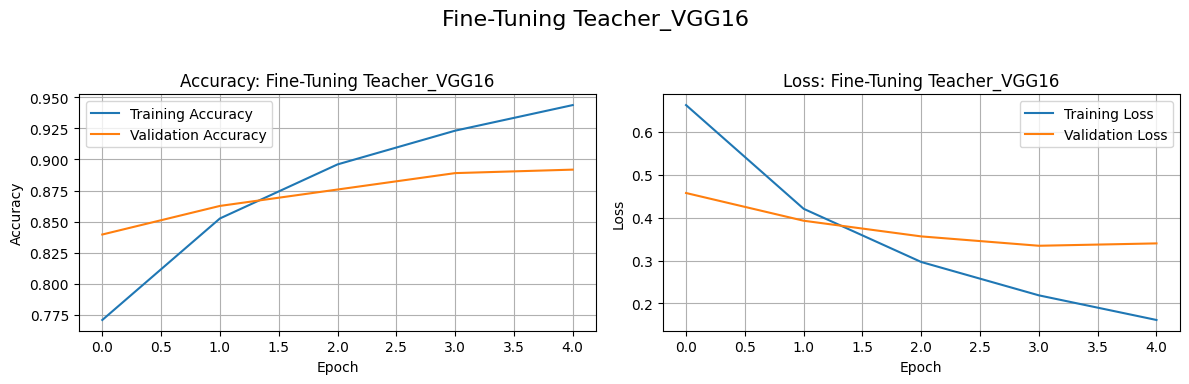


--- Evaluating Teacher Models ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8866 - loss: 0.3596
Fine-tuned VGG16 Test Accuracy: 0.8892


In [7]:
# --- VGG16 Teacher ---
vgg16_base = keras.applications.VGG16(
    include_top=False, weights="imagenet", input_shape=(64, 64, 3)
)
teacher_vgg16 = fine_tune_model(vgg16_base, name="Teacher_VGG16")
teacher_vgg16.save("teacher_vgg16.h5")

print("\n--- Evaluating Teacher Models ---")
vgg16_loss, vgg16_acc = teacher_vgg16.evaluate(x_test, y_test_one_hot)
print(f"Fine-tuned VGG16 Test Accuracy: {vgg16_acc:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

--- Training head of Teacher_ResNet50 ---
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.1704 - loss: 2.2292 - val_accuracy: 0.2968 - val_loss: 1.9501
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.2667 - loss: 1.9807 - val_accuracy: 0.3268 - val_loss: 1.8495
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.2966 - loss: 1.9193 - val_accuracy: 0.3316 - val_loss: 1.8277
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.3087 - loss: 1.8789 - val_accuracy: 0.3560 - val_loss: 1.7856
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.3138 - loss: 1.8636 - val_accuracy: 0.3570 - val_loss: 1.7611

--- Fine-tuning all layers of Teacher_ResNet50 ---
Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 135s 111ms/step - accuracy: 0.2054 - loss: 8.2720 - val_accuracy: 0.1314 - val_loss: 12.8748
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.4367 - los

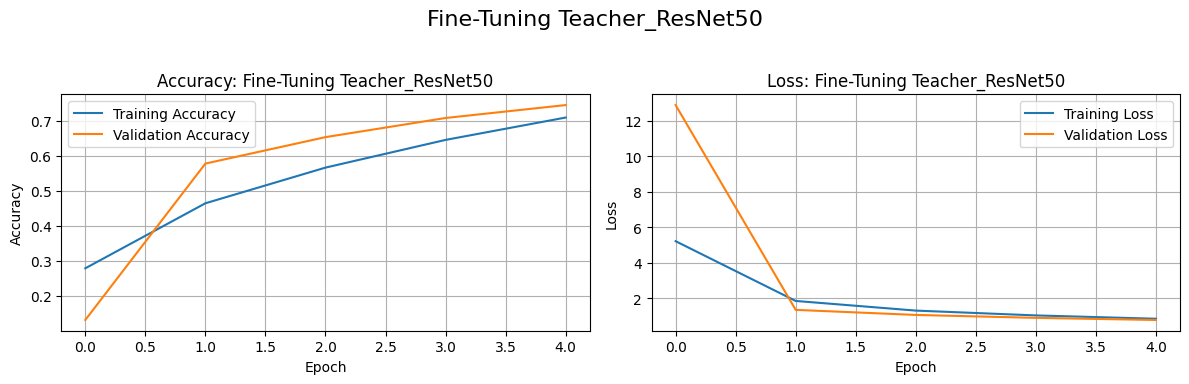


--- Evaluating Teacher Models ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7314 - loss: 0.8253
Fine-tuned ResNet50 Test Accuracy: 0.7313


In [8]:
# --- ResNet50 Teacher ---
resnet50_base = keras.applications.ResNet50(
    include_top=False, weights="imagenet", input_shape=(64, 64, 3)
)
teacher_resnet50 = fine_tune_model(resnet50_base, name="Teacher_ResNet50")
teacher_resnet50.save("teacher_resnet50.h5")

print("\n--- Evaluating Teacher Models ---")
resnet50_loss, resnet50_acc = teacher_resnet50.evaluate(x_test, y_test_one_hot)
print(f"Fine-tuned ResNet50 Test Accuracy: {resnet50_acc:.4f}")

In [13]:
# # --- 6. Knowledge Distillation Framework ---
# class Distiller(keras.Model):
#     def __init__(self, student, teacher):
#         super(Distiller, self).__init__()
#         self.student = student
#         self.teacher = teacher

#     def compile(
#         self,
#         optimizer,
#         metrics,
#         student_loss_fn,
#         distillation_loss_fn,
#         alpha=0.1,
#         temperature=3,
#     ):
#         super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
#         self.student_loss_fn = student_loss_fn
#         self.distillation_loss_fn = distillation_loss_fn
#         self.alpha = alpha
#         self.temperature = temperature

#     def train_step(self, data):
#         x, y = data
#         # The teacher is not trained, so we use it in inference mode.
#         teacher_predictions = self.teacher(x, training=False)

#         with tf.GradientTape() as tape:
#             student_predictions = self.student(x, training=True)
#             # Calculate losses
#             student_loss = self.student_loss_fn(y, student_predictions)
#             distillation_loss = self.distillation_loss_fn(
#                 tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
#                 tf.nn.softmax(student_predictions / self.temperature, axis=1),
#             )
#             loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

#         # Compute gradients and update weights of the student
#         trainable_vars = self.student.trainable_variables
#         gradients = tape.gradient(loss, trainable_vars)
#         self.optimizer.apply_gradients(zip(gradients, trainable_vars))

#         # Update metrics
#         self.compiled_metrics.update_state(y, student_predictions)
#         return {m.name: m.result() for m in self.metrics}

#     def test_step(self, data):
#         x, y = data
#         y_prediction = self.student(x, training=False)
#         student_loss = self.student_loss_fn(y, y_prediction)
#         self.compiled_metrics.update_state(y, y_prediction)
#         return {m.name: m.result() for m in self.metrics}

import tensorflow as tf
from tensorflow import keras

# --- The Final, Corrected Knowledge Distillation Framework ---
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.student = student
        self.teacher = teacher
        # We will create the metric trackers in compile()
        self.student_loss_tracker = None
        self.distillation_loss_tracker = None
        self.total_loss_tracker = None

    @property
    def metrics(self):
        # Start with the metrics from compile() (e.g., accuracy).
        # These are managed by the parent class.
        metrics = super().metrics
        # Add our custom loss trackers if they exist (i.e., if compiled).
        if self.total_loss_tracker is not None:
            metrics.append(self.total_loss_tracker)
        if self.student_loss_tracker is not None:
            metrics.append(self.student_loss_tracker)
        if self.distillation_loss_tracker is not None:
            metrics.append(self.distillation_loss_tracker)
        return metrics

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        # This call configures the metrics passed to it (e.g., "accuracy")
        super().compile(optimizer=optimizer, metrics=metrics)
        # Store loss functions and hyperparameters
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature
        # Create our custom metric trackers
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.student_loss_tracker = keras.metrics.Mean(name="student_loss")
        self.distillation_loss_tracker = keras.metrics.Mean(name="distillation_loss")

    def train_step(self, data):
        x, y = data
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            # Calculate individual losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            # Calculate the weighted total loss for training
            total_loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients and update student weights
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # --- Update all metrics ---
        # Update the compiled metrics (accuracy)
        self.compiled_metrics.update_state(y, student_predictions)
        # Update our custom loss trackers
        self.total_loss_tracker.update_state(total_loss)
        self.student_loss_tracker.update_state(student_loss)
        self.distillation_loss_tracker.update_state(distillation_loss)

        # Return a dictionary of all metric results.
        # self.metrics now correctly includes everything.
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data
        student_predictions = self.student(x, training=False)
        teacher_predictions = self.teacher(x, training=False)

        # Calculate losses
        student_loss = self.student_loss_fn(y, student_predictions)
        distillation_loss = self.distillation_loss_fn(
            tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
            tf.nn.softmax(student_predictions / self.temperature, axis=1),
        )
        total_loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # --- Update all metrics ---
        self.compiled_metrics.update_state(y, student_predictions)
        self.total_loss_tracker.update_state(total_loss)
        self.student_loss_tracker.update_state(student_loss)
        self.distillation_loss_tracker.update_state(distillation_loss)

        # Return a dictionary of all metric results
        return {m.name: m.result() for m in self.metrics}


--- Distilling knowledge from VGG-16 Teacher ---
Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.3113 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1136 - total_loss: 0.1007 - val_distillation_loss: 0.0992 - val_loss: 0.1000 - val_student_loss: 0.1099 - val_total_loss: 0.1003
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.5195 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1095 - total_loss: 0.1003 - val_distillation_loss: 0.0992 - val_loss: 0.1000 - val_student_loss: 0.1091 - val_total_loss: 0.1002
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.5880 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1082 - total_loss: 0.1001 - val_distillation_loss: 0.0992 - val_loss: 0.1000 - val_student_loss: 0.1075 - val_total_loss: 0.1000
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.6267 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1074 - total_loss: 0.1000 -

KeyError: 'val_accuracy'

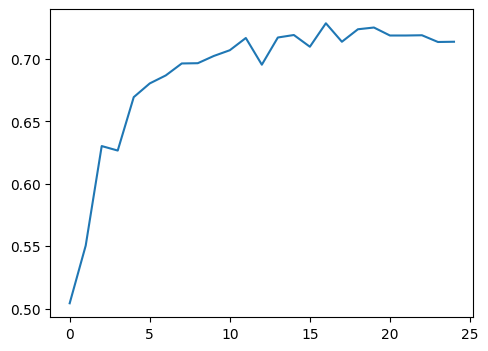

In [14]:
# --- 7. Distillation from a Single Teacher ---
# Create new student instance
student_from_single_teacher = build_small_cnn()

# Instantiate the distiller
distiller_single = Distiller(student=student_from_single_teacher, teacher=teacher_vgg16)

distiller_single.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.CategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

print("\n--- Distilling knowledge from VGG-16 Teacher ---")
history_distill_single = distiller_single.fit(x_train, y_train_one_hot, epochs=25, batch_size=64, validation_split=0.1)

distiller_single.student.compile(loss="categorical_crossentropy", metrics=["accuracy"])

# Evaluate the student model
test_loss, test_acc = distiller_single.student.evaluate(x_test, y_test_one_hot)
performance_summary['Small CNN (1 Teacher - VGG-16)'] = test_acc
print(f"\nDistilled Student (1 Teacher) Test accuracy: {test_acc:.4f}")

# --- Figure 4: Training Performance of Distilled CNN (1 Teacher) ---
# plot_history(history_distill_single, "Small CNN Distilled from VGG-16")

In [15]:
# --- 8. Ensemble Teacher and Distillation from Two Teachers ---
class EnsembleTeacher(keras.Model):
    def __init__(self, teacher1, teacher2):
        super(EnsembleTeacher, self).__init__()
        self.teacher1 = teacher1
        self.teacher2 = teacher2

    def call(self, x):
        pred1 = self.teacher1(x, training=False)
        pred2 = self.teacher2(x, training=False)
        # Return the average of the two teachers' predictions
        return (pred1 + pred2) / 2

In [16]:
# Create new student instance
student_from_two_teachers = build_small_cnn()

# Create the ensemble teacher model
ensemble_teacher = EnsembleTeacher(teacher_vgg16, teacher_resnet50)

# Instantiate the distiller with the ensemble teacher
distiller_two_teachers = Distiller(student=student_from_two_teachers, teacher=ensemble_teacher)

distiller_two_teachers.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
    student_loss_fn=keras.losses.CategoricalCrossentropy(),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

print("\n--- Distilling knowledge from an Ensemble of Two Teachers ---")
history_distill_two = distiller_two_teachers.fit(x_train, y_train_one_hot, epochs=25, batch_size=64, validation_split=0.1)

distiller_two_teachers.student.compile(loss="categorical_crossentropy", metrics=["accuracy"])

# Evaluate the final student model
test_loss, test_acc = distiller_two_teachers.student.evaluate(x_test, y_test_one_hot)
performance_summary['Small CNN (2 Teachers)'] = test_acc
print(f"\nDistilled Student (2 Teachers) Test accuracy: {test_acc:.4f}")

# --- Figure 5: Training Performance of Distilled CNN (2 Teachers) ---
# plot_history(history_distill_two, "Small CNN Distilled from VGG16 & ResNet50")


--- Distilling knowledge from an Ensemble of Two Teachers ---
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - accuracy: 0.3472 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1130 - total_loss: 0.1006 - val_distillation_loss: 0.0992 - val_loss: 0.1000 - val_student_loss: 0.1096 - val_total_loss: 0.1003
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 70s 59ms/step - accuracy: 0.5493 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1090 - total_loss: 0.1002 - val_distillation_loss: 0.0992 - val_loss: 0.1000 - val_student_loss: 0.1086 - val_total_loss: 0.1002
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.6150 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1077 - total_loss: 0.1001 - val_distillation_loss: 0.0992 - val_loss: 0.1000 - val_student_loss: 0.1074 - val_total_loss: 0.1000
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.6575 - distillation_loss: 0.0992 - loss: 0.1000 - student_loss: 0.1068 - total_loss: 0.1000 - val_distillation_loss: 0.0992 - val_loss: 0.1000 - val_stude

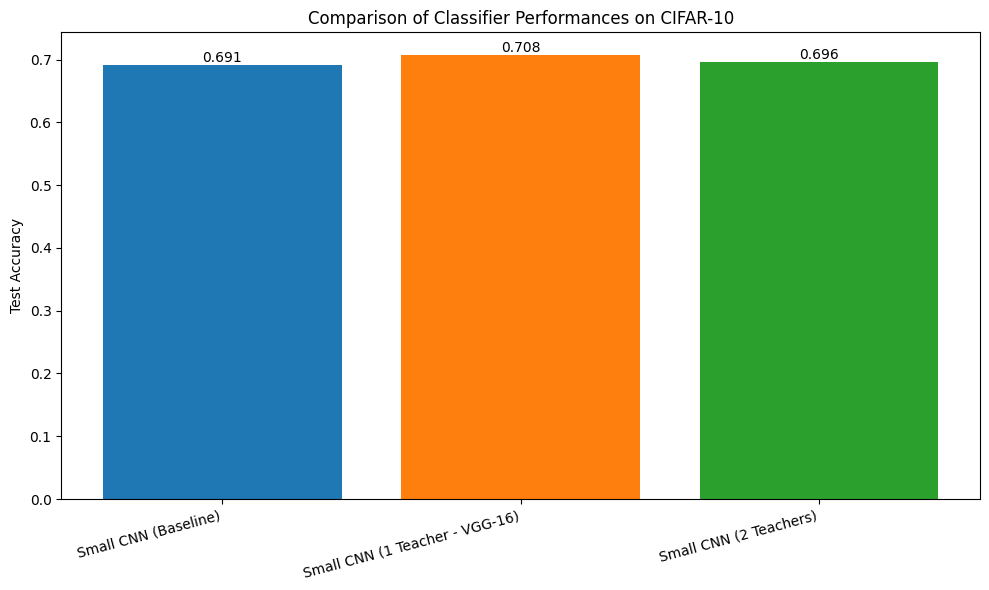

In [18]:
# --- 9. Final Comparison ---
plt.figure(figsize=(10, 6))
models = list(performance_summary.keys())
accuracies = list(performance_summary.values())

bars = plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Test Accuracy')
plt.title('Comparison of Classifier Performances on CIFAR-10')
plt.ylim() # Zoom in for better visibility
plt.xticks(rotation=15, ha="right")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')

plt.tight_layout()
plt.show()

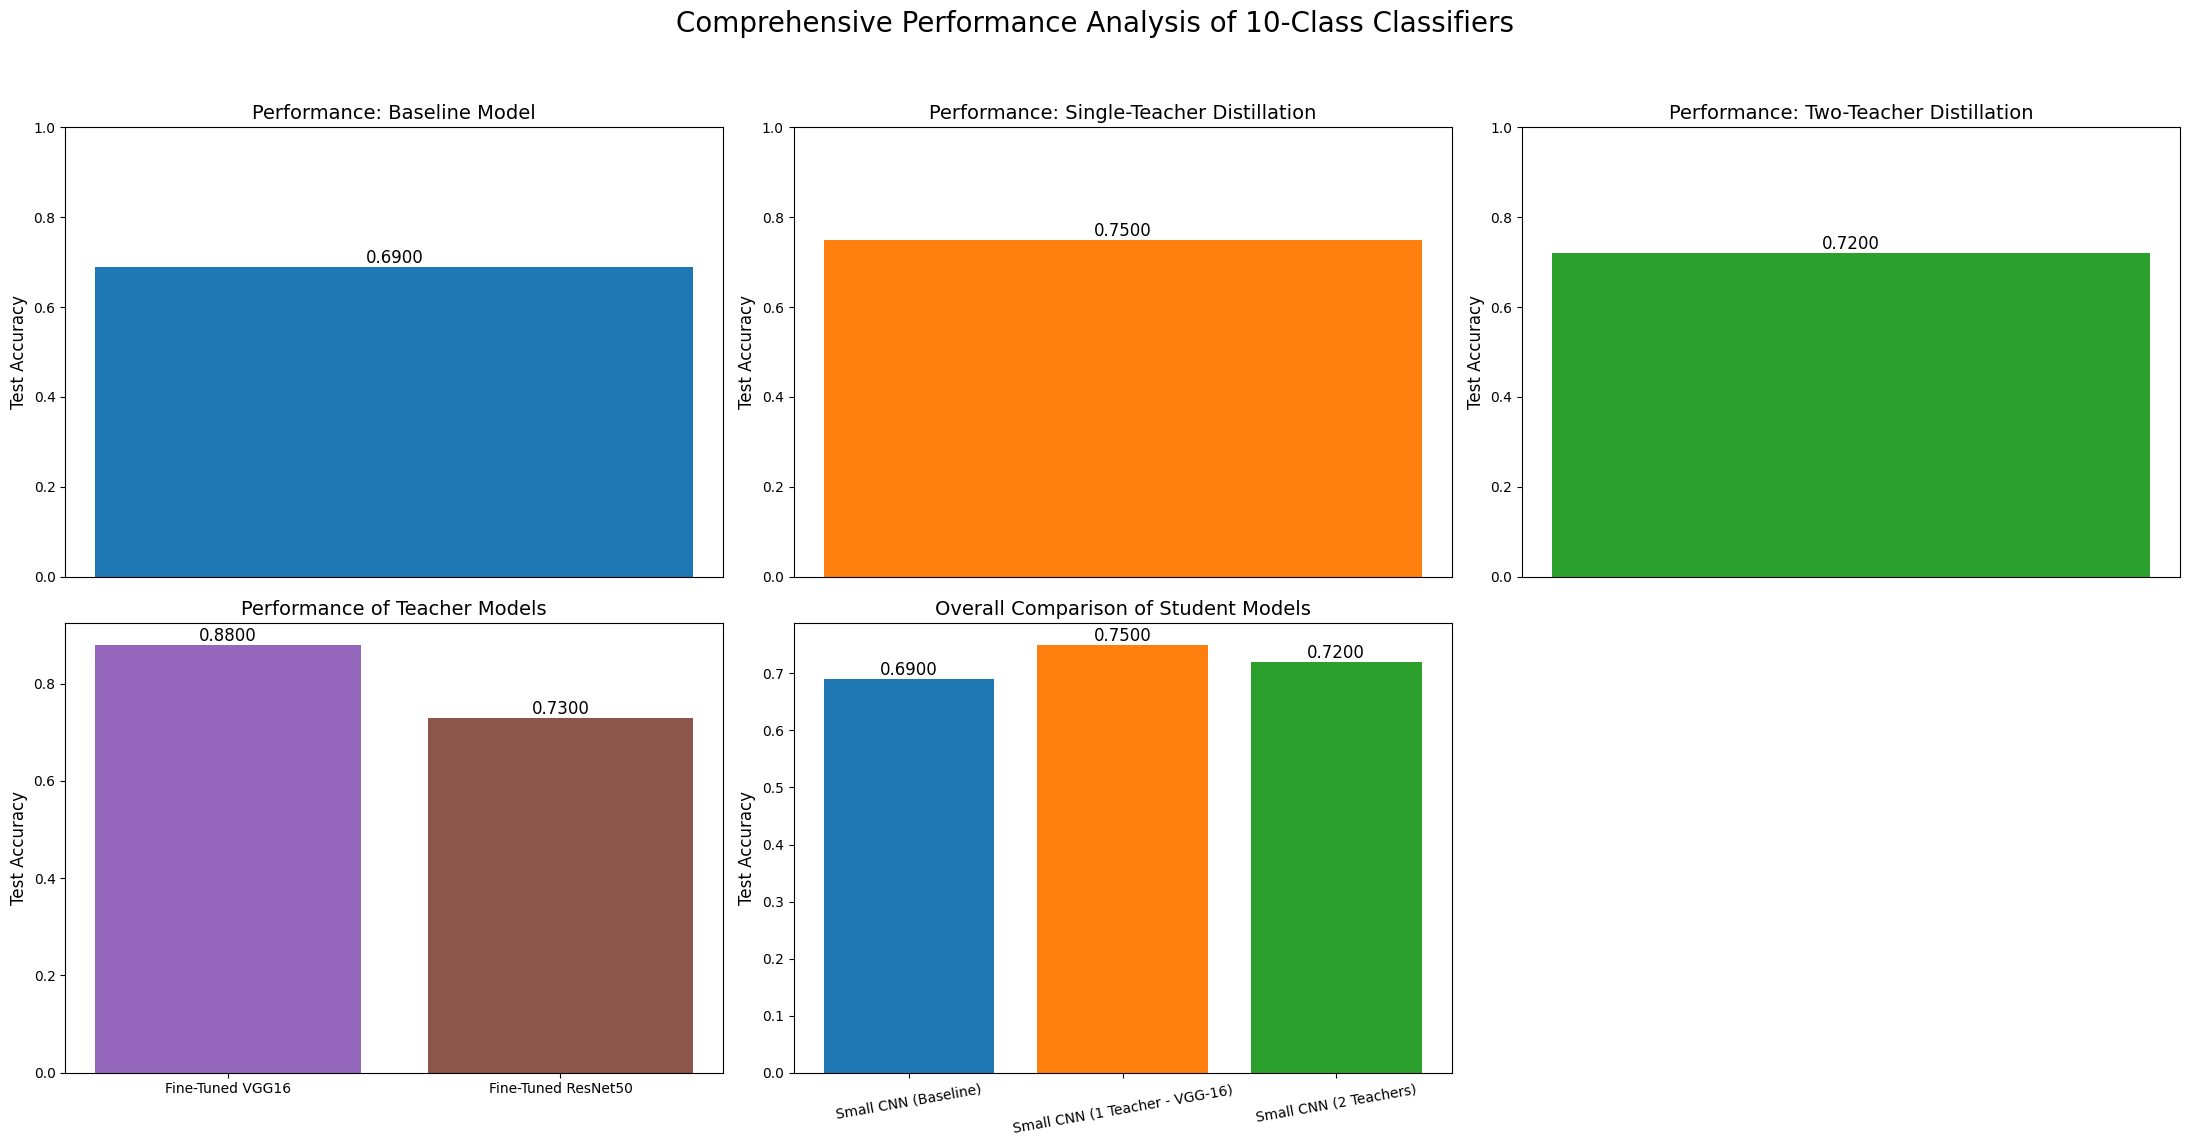

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. GATHER THE DATA ---
# These are example values. Replace them with your actual recorded accuracies.
performance_summary = {
    'Small CNN (Baseline)': 0.69,
    'Small CNN (1 Teacher - VGG-16)': 0.75,
    'Small CNN (2 Teachers)': 0.72,
}

teacher_accuracies = {
    'Fine-Tuned VGG16': 0.88,
    'Fine-Tuned ResNet50': 0.73
}

# --- 2. CREATE A 2x3 SUBPLOT GRID ---
# We create a grid to hold all our charts.
fig, axs = plt.subplots(2, 3, figsize=(22, 12))

# --- Chart 1: Baseline Small CNN ---
ax1 = axs[0, 0]
model_name_1 = 'Small CNN (Baseline)'
acc_1 = performance_summary[model_name_1]
ax1.bar([model_name_1], [acc_1], color='#1f77b4', width=0.4)
ax1.set_title('Performance: Baseline Model', fontsize=14)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.set_ylim(0, 1.0)
ax1.text(0, acc_1, f'{acc_1:.4f}', va='bottom', ha='center', fontsize=12)
ax1.set_xticks([]) # Hide x-axis ticks

# --- Chart 2: Small CNN Distilled from 1 Teacher ---
ax2 = axs[0, 1]
model_name_2 = 'Small CNN (1 Teacher - VGG-16)'
acc_2 = performance_summary[model_name_2]
ax2.bar([model_name_2], [acc_2], color='#ff7f0e', width=0.4)
ax2.set_title('Performance: Single-Teacher Distillation', fontsize=14)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.set_ylim(0, 1.0)
ax2.text(0, acc_2, f'{acc_2:.4f}', va='bottom', ha='center', fontsize=12)
ax2.set_xticks([]) # Hide x-axis ticks

# --- Chart 3: Small CNN Distilled from 2 Teachers ---
ax3 = axs[0, 2]
model_name_3 = 'Small CNN (2 Teachers)'
acc_3 = performance_summary[model_name_3]
ax3.bar([model_name_3], [acc_3], color='#2ca02c', width=0.4)
ax3.set_title('Performance: Two-Teacher Distillation', fontsize=14)
ax3.set_ylabel('Test Accuracy', fontsize=12)
ax3.set_ylim(0, 1.0)
ax3.text(0, acc_3, f'{acc_3:.4f}', va='bottom', ha='center', fontsize=12)
ax3.set_xticks([]) # Hide x-axis ticks

# --- Chart 4: Teacher Model Performance ---
ax4 = axs[1, 0]
teacher_names = list(teacher_accuracies.keys())
teacher_accs = list(teacher_accuracies.values())
ax4.bar(teacher_names, teacher_accs, color=['#9467bd', '#8c564b'])
ax4.set_title('Performance of Teacher Models', fontsize=14)
ax4.set_ylabel('Test Accuracy', fontsize=12)
ax4.set_ylim() # Zoom in for detail
for i, acc in enumerate(teacher_accs):
    ax4.text(i, acc, f'{acc:.4f}', va='bottom', ha='center', fontsize=12)

# --- Chart 5: Final Summary Comparison ---
ax5 = axs[1, 1]
student_names = list(performance_summary.keys())
student_accs = list(performance_summary.values())
ax5.bar(student_names, student_accs, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax5.set_title('Overall Comparison of Student Models', fontsize=14)
ax5.set_ylabel('Test Accuracy', fontsize=12)
ax5.set_ylim() # Zoom in to highlight differences
ax5.tick_params(axis='x', rotation=10) # Rotate labels slightly
for i, acc in enumerate(student_accs):
    ax5.text(i, acc, f'{acc:.4f}', va='bottom', ha='center', fontsize=12)


# --- Turn off the unused subplot ---
axs[1, 2].axis('off')

# --- Add a Main Title for the Entire Figure ---
fig.suptitle('Comprehensive Performance Analysis of 10-Class Classifiers', fontsize=20)

# Adjust layout to prevent titles from overlapping
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()